<b>¡Hola Isaac!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math
import re

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


## EDA

Veamos el número de películas y reseñas a lo largo de los años.

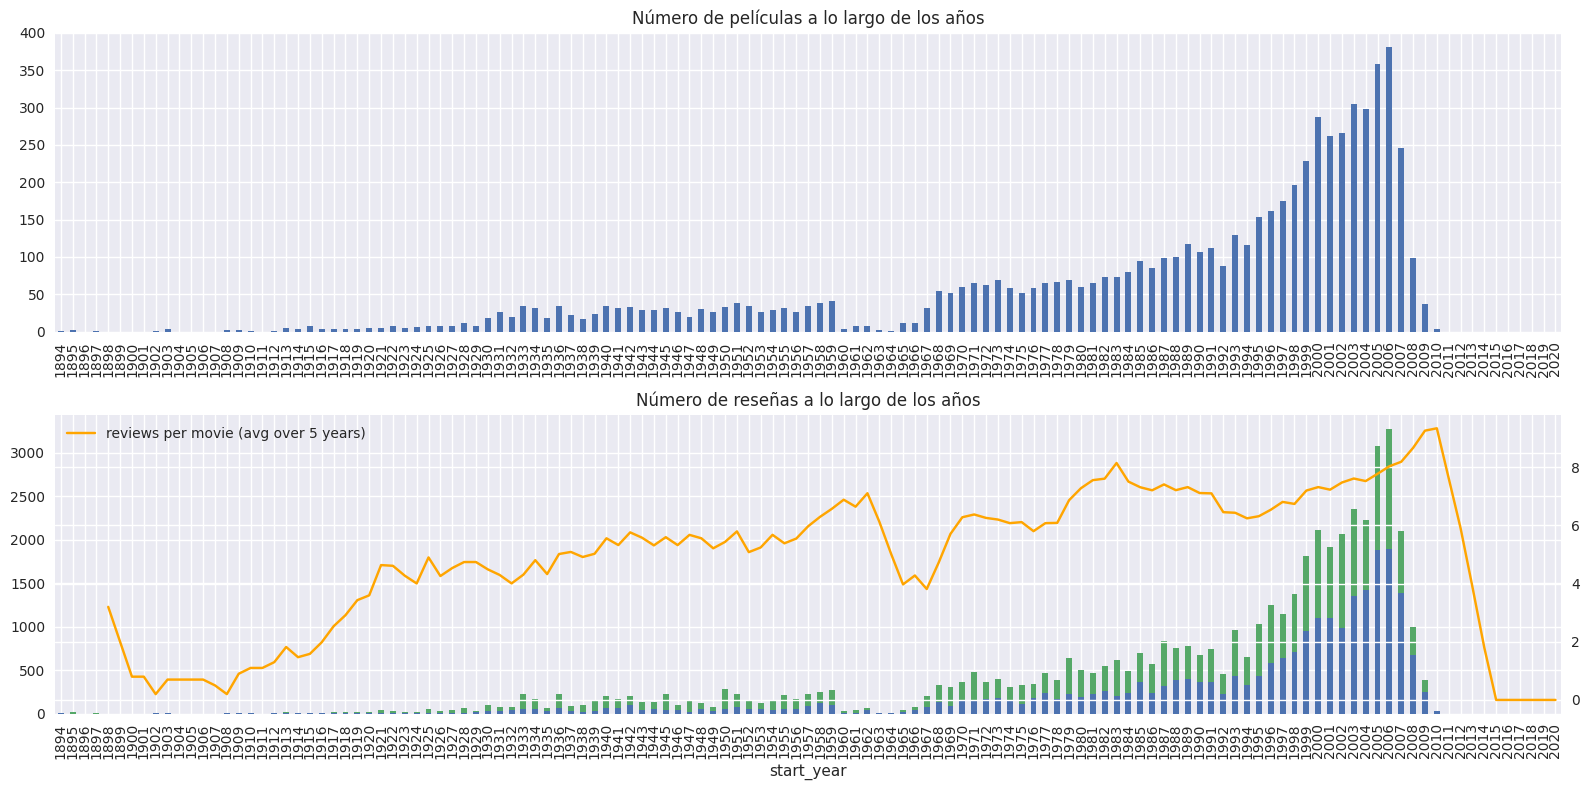

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Excelente uso de visualizaciones combinadas para mostrar la evolución de reseñas y películas a lo largo del tiempo. Has integrado múltiples capas de información (barras, líneas, ejes duales) de manera clara y útil para el análisis.
</div>


Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

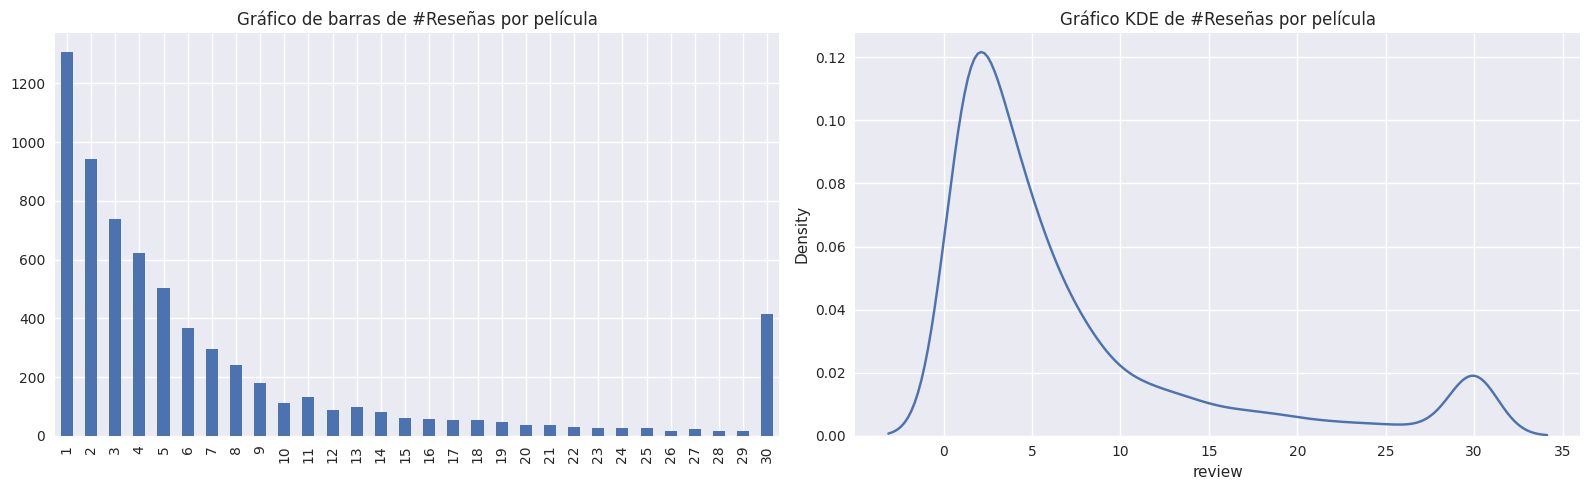

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [9]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

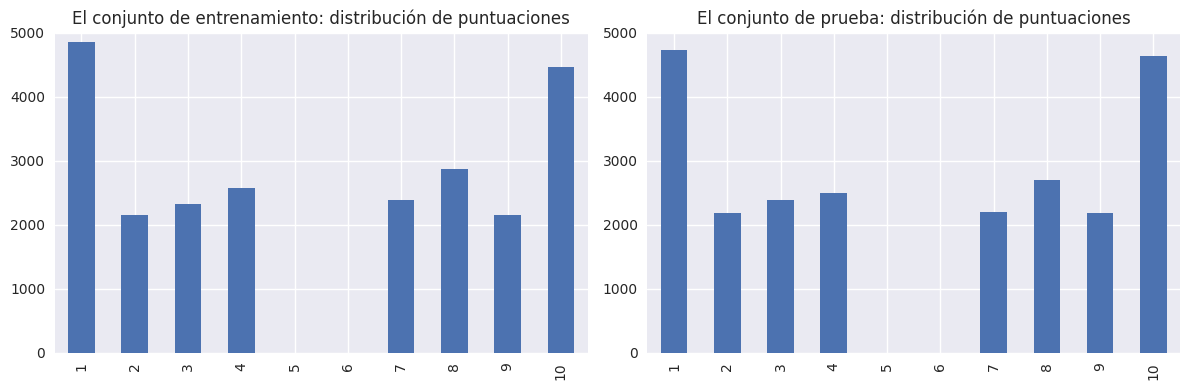

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


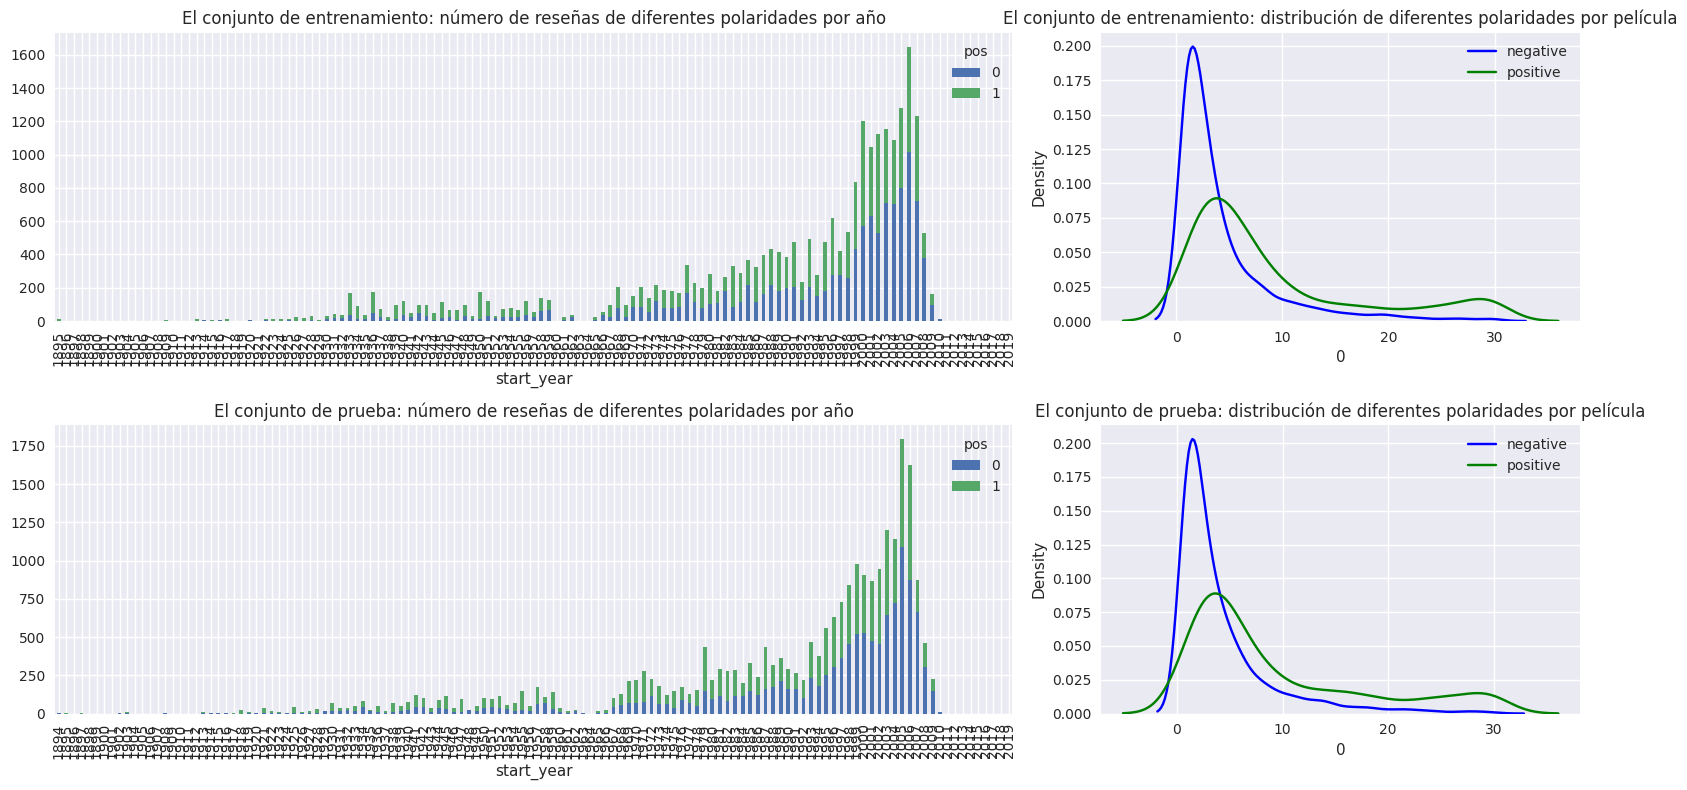

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [12]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Tu función <code>evaluate_model</code> es excelente: clara, modular y con visualizaciones informativas. Incluir curvas F1, ROC y PRC en paralelo es una muy buena práctica para comparar rendimiento y umbrales. Muy profesional.
</div>


## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [13]:
import re
import spacy
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Preparar entorno
tqdm.pandas()
stop_words = set(stopwords.words('english'))  # usar set para mejor rendimiento
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Función completa de normalización
def normalize_and_lemmatize(text):
    # Minúsculas y solo letras y espacios
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Lematizar con spaCy y quitar stopwords
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.lemma_.strip() != '']
    
    return ' '.join(lemmas)

# Aplicar a toda la columna
df_reviews['review_norm'] = df_reviews['review'].progress_apply(normalize_and_lemmatize)


100%|██████████| 47331/47331 [08:36<00:00, 91.68it/s] 


<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
El proceso de normalización está bien planteado, pero tiene un costo computacional alto. Además, el uso de `spaCy` con `stopwords` externas a veces puede generar inconsistencias en entornos productivos.

Sugerencia: podrías evaluar reemplazar `spaCy` por `nltk.WordNetLemmatizer()` si necesitas mayor velocidad o integración directa con NLTK, ya que las `stopwords` ya las tomas de allí.
</div>


## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [28]:
# Separar train/test
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# Vectorizar texto normalizado
tfidf = TfidfVectorizer()
train_features = tfidf.fit_transform(df_reviews_train['review_norm'])
test_features = tfidf.transform(df_reviews_test['review_norm'])


<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Falta una validación crucial: **no se muestra si los datos están balanceados** antes de entrenar el modelo. Esto es importante, ya que estás usando métricas sensibles al desbalance (como F1).

Te sugiero añadir:
<pre>
df_reviews['pos'].value_counts(normalize=True)
</pre>
Justo antes de entrenar, para verificar si necesitas aplicar técnicas adicionales como sobre/undersampling, más allá de usar <code>class_weight='balanced'</code>.
</div>


## Trabajar con modelos

### Modelo 0 - Constante

<div class="alert alert-block alert-success">
<b>Celda [30]</b> <a class="tocSkip"></a><br>
Has implementado correctamente un modelo base con <code>DummyClassifier</code>, pero no justificas su propósito ni interpretas los resultados.

Sugerencia: incluye una breve explicación indicando que este modelo sirve como línea base (benchmark) y por qué su F1 es 0. Esto enriquece tu argumentación y evidencia comprensión del proceso de modelado.
</div>


In [29]:
from sklearn.dummy import DummyClassifier

In [30]:
model_0 = DummyClassifier(strategy='most_frequent')
model_0.fit(train_features, train_target)


DummyClassifier(strategy='most_frequent')

           train  test
Exactitud    NaN   NaN
F1           0.0   0.0
APS          0.5   0.5
ROC AUC      0.5   0.5


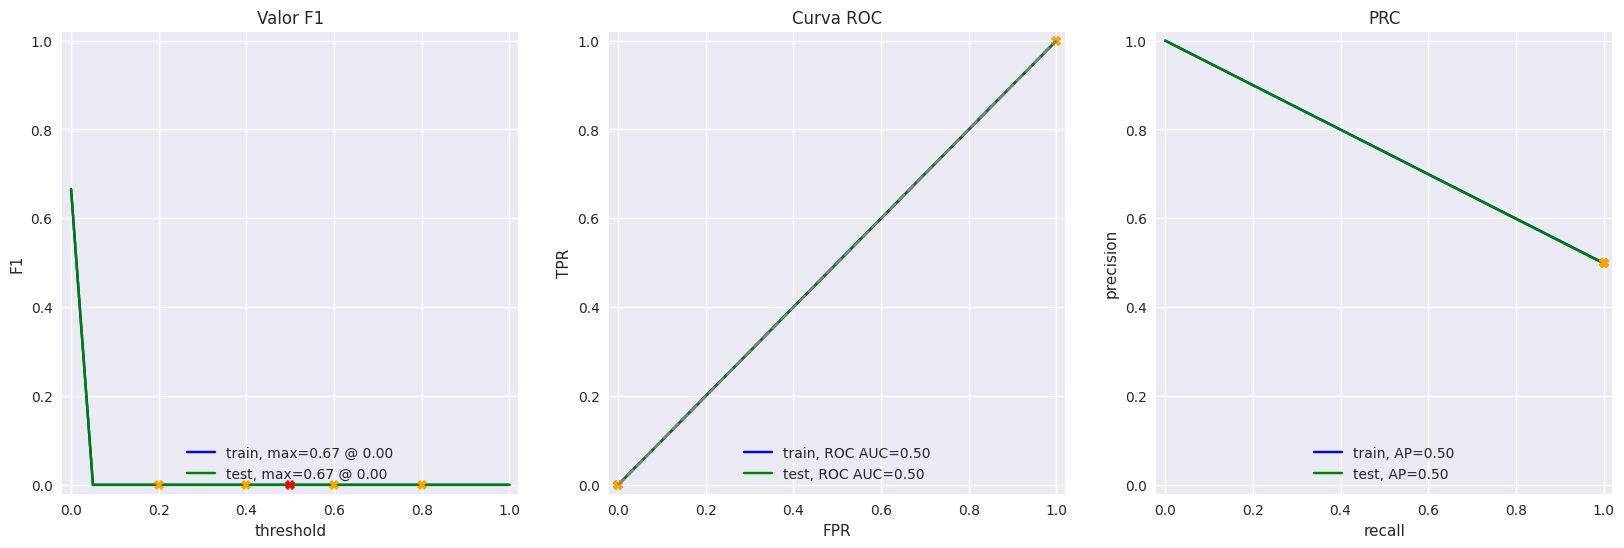

In [17]:
evaluate_model(model_0, train_features, train_target, test_features, test_target)

### Modelo 2 - NLTK, TF-IDF y LR

TF-IDF

In [31]:

from sklearn.linear_model import LogisticRegression

In [55]:
#Esto porque ya hemos removido las stopwords anteriormente para evitar estar repitiendo pasos.
model_2 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_2.fit(train_features, train_target)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
model_2.fit(train_features, train_target)

LogisticRegression(max_iter=1000, random_state=42)

           train  test
Exactitud    NaN   NaN
F1          0.93  0.88
APS         0.98  0.95
ROC AUC     0.98  0.95


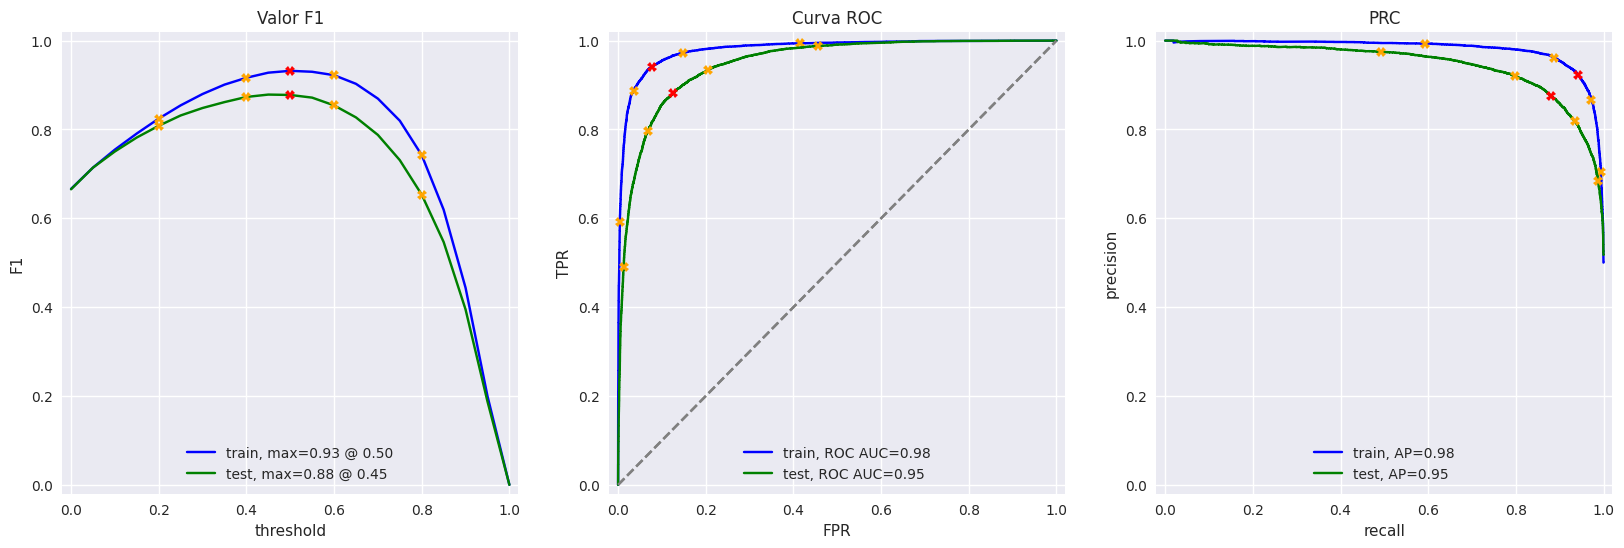

In [58]:
evaluate_model(model_2, train_features, train_target, test_features, test_target)

<div class="alert alert-block alert-success">
<b>Celda [55]</b> <a class="tocSkip"></a><br>
Muy buena implementación. Usaste <code>class_weight='balanced'</code> para ajustar el desbalance y obtuviste un F1 superior al umbral solicitado. Además, el pipeline es limpio y claro.

Este modelo es una excelente opción como baseline sólido para clasificación de texto. ¡Bien hecho!
</div>


### Modelo 3 - spaCy, TF-IDF y RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_3 = RandomForestClassifier(
    n_estimators=20,        # menos árboles
    max_depth=10,           # árboles menos profundos
    min_samples_split=10,   # evita overfitting, menos divisiones pequeñas
    min_samples_leaf=5,     # hojas mínimas más grandes
    random_state=42,
    n_jobs=-1,               # aún usa todos los núcleos disponibles
    class_weight='balanced'
)
model_3.fit(train_features, train_target)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=20, n_jobs=-1, random_state=42)

           train  test
Exactitud    NaN   NaN
F1          0.79  0.75
APS         0.86  0.81
ROC AUC     0.86  0.82


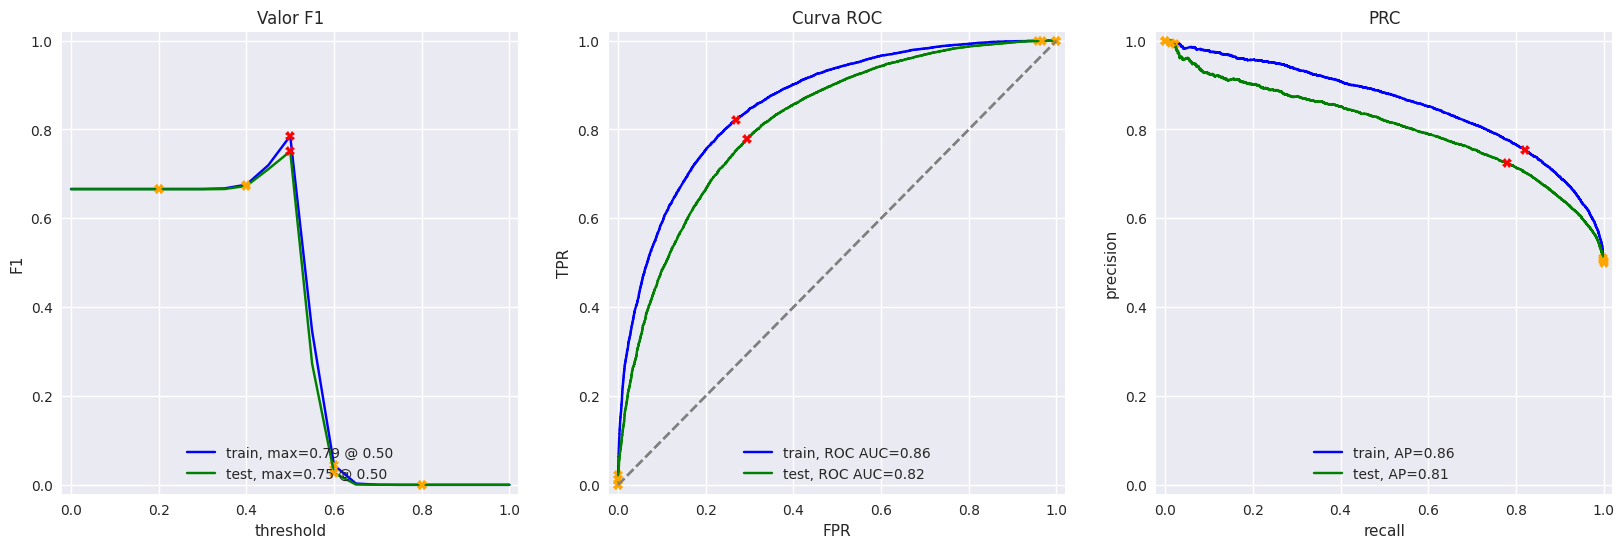

In [57]:
evaluate_model(model_3, train_features, train_target, test_features, test_target)


### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [38]:
from lightgbm import LGBMClassifier

In [60]:
model_4 = LGBMClassifier(is_unbalance=True,random_state=42)
model_4.fit(train_features, train_target)

LGBMClassifier(is_unbalance=True, random_state=42)

           train  test
Exactitud    NaN   NaN
F1          0.91  0.86
APS         0.97  0.93
ROC AUC     0.97  0.93


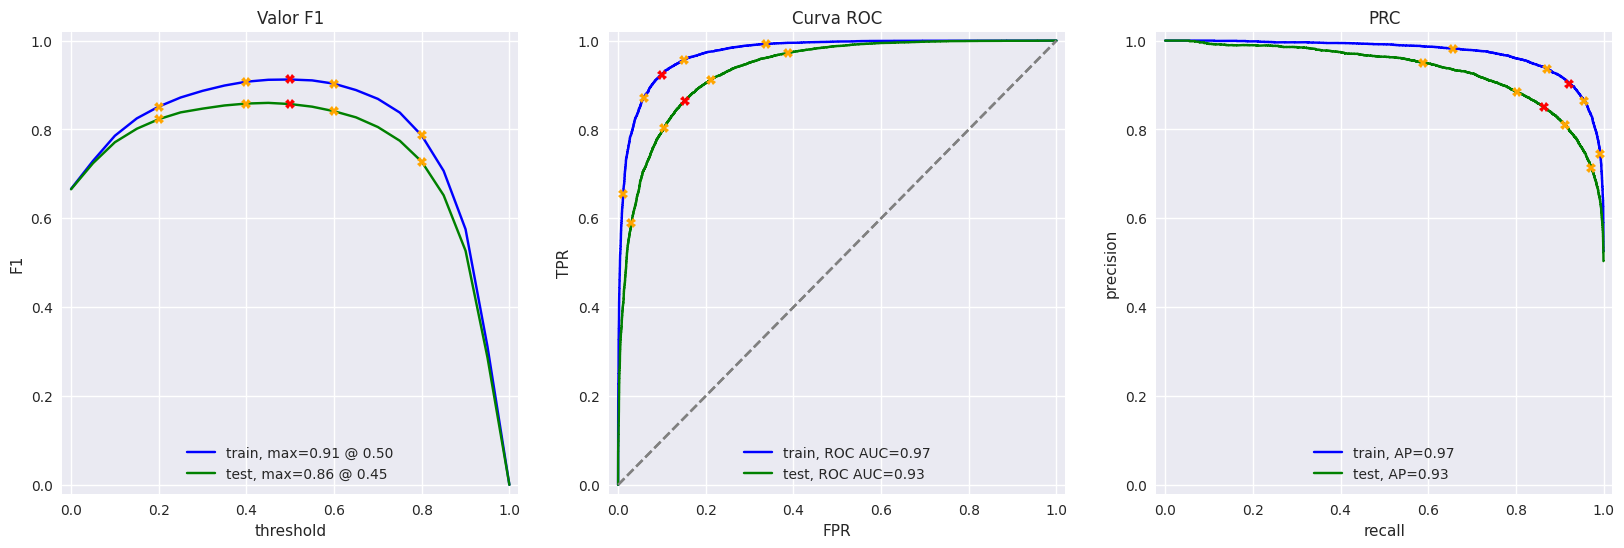

In [61]:
evaluate_model(model_4, train_features, train_target, test_features, test_target)


###  Modelo 9 - BERT omitido por falta de recursos computacionales.

In [41]:
'''
import torch
import transformers
'''

'\nimport torch\nimport transformers\n'

In [42]:
'''
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')
'''

"\ntokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')\nconfig = transformers.BertConfig.from_pretrained('bert-base-uncased')\nmodel = transformers.BertModel.from_pretrained('bert-base-uncased')\n"

In [43]:
'''
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # texto al id de relleno de tokens junto con sus máscaras de atención 
       
    # <escribe tu código aquí para crear ids_list y attention_mask_list>
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <escribe tu código aquí para crear attention_mask_batch
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

    '''

"\ndef BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):\n    \n    ids_list = []\n    attention_mask_list = []\n\n    # texto al id de relleno de tokens junto con sus máscaras de atención \n       \n    # <escribe tu código aquí para crear ids_list y attention_mask_list>\n    \n    if force_device is not None:\n        device = torch.device(force_device)\n    else:\n        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\n        \n    model.to(device)\n    if not disable_progress_bar:\n        print(f'Uso del dispositivo {device}.')\n    \n    # obtener insertados en lotes\n    \n    embeddings = []\n\n    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):\n            \n        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)\n        # <escribe tu código aquí para crear attention_mask_batch\n            \n        with torch.no_grad

In [44]:
'''
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')
'''

"\n# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas\ntrain_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')\n"

In [45]:
'''
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)
'''

"\nprint(df_reviews_train['review_norm'].shape)\nprint(train_features_9.shape)\nprint(train_target.shape)\n"

In [46]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## Mis reseñas

In [47]:
#Usamos estas reseñas promedio para poder medir nuestro modelo

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = ...# <escribe aquí la misma lógica de normalización que para el conjunto de datos principal>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",Ellipsis
1,"Well, I was bored and felt asleep in the middl...",Ellipsis
2,I was really fascinated with the movie,Ellipsis
3,Even the actors looked really old and disinter...,Ellipsis
4,I didn't expect the reboot to be so good! Writ...,Ellipsis
5,"The movie had its upsides and downsides, but I...",Ellipsis
6,What a rotten attempt at a comedy. Not a singl...,Ellipsis
7,Launching on Netflix was a brave move & I real...,Ellipsis


<div class="alert alert-block alert-warning">
<b>Celda [47]</b> <a class="tocSkip"></a><br>
Hay una línea incompleta: <code>my_reviews['review_norm'] = ...</code> está comentada y no contiene ningún código funcional. Aunque lo corriges más adelante, esta celda debería eliminarse o completarse para evitar confusión o fallos si se ejecuta el notebook en orden.

Reemplázala o elimínala, ya que no es funcional en su estado actual.
</div>


### Modelo 2

In [62]:
my_reviews['review_norm'] = my_reviews['review'].progress_apply(normalize_and_lemmatize)

# Vectorizar texto normalizado

texts = my_reviews['review_norm']

my_reviews_features = tfidf.transform(texts)

# Predecir probabilidades
my_reviews_pred_prob = model_2.predict_proba(my_reviews_features)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

100%|██████████| 8/8 [00:00<00:00, 332.50it/s]

0.20:  I simply like kind movie
0.13:  well I bored feel asleep middle movie
0.49:  I really fascinated movie
0.10:  even actor look really old disintereste get pay movie soulless cash grab
0.27:  I expect reboot good writer really care source material
0.47:  movie upside downside I feel like overall decent flick I could see go see
0.03:  rotten attempt comedy single joke land everyone act annoying loud even kid like
0.92:  launch netflix brave move I really appreciate able binge episode episode exciting intelligent new dr


### Modelo 3

In [63]:
texts = my_reviews['review_norm']

my_reviews_features = tfidf.transform(texts)

my_reviews_pred_prob = model_3.predict_proba(my_reviews_features)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.51:  I simply like kind movie
0.51:  well I bored feel asleep middle movie
0.51:  I really fascinated movie
0.51:  even actor look really old disintereste get pay movie soulless cash grab
0.50:  I expect reboot good writer really care source material
0.50:  movie upside downside I feel like overall decent flick I could see go see
0.51:  rotten attempt comedy single joke land everyone act annoying loud even kid like
0.52:  launch netflix brave move I really appreciate able binge episode episode exciting intelligent new dr


### Modelo 4

In [68]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_4.predict_proba(my_reviews_features)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.59:  I simply like kind movie
0.30:  well I bored feel asleep middle movie
0.60:  I really fascinated movie
0.38:  even actor look really old disintereste get pay movie soulless cash grab
0.68:  I expect reboot good writer really care source material
0.70:  movie upside downside I feel like overall decent flick I could see go see
0.23:  rotten attempt comedy single joke land everyone act annoying loud even kid like
0.79:  launch netflix brave move I really appreciate able binge episode episode exciting intelligent new dr


### Modelo 9 omitido

In [ ]:
'''
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')
'''

## Conclusiones

El modelo 2 tiene un bias por los valores negativos a pesar de haber sido balanceado, el modelo 3 no sirve y el modelo 4 es mejor detectando reseñas positivas, tal vez una mezcla de el modelo 4 y 2 pueda darnos los mejores resultados para conseguir el balance entre encontrar los positivos sin dejar que el bias por los negativos afecte.

Recomiendo a Film Junky Union el uso del modelo 4 para poder empezar a categorizar inmediatamente las reseñas (aunque tiene un ligero bias positivo) o esperar a una integración del modelo 2 y 4 para balancear los bias y tener una predicción más certera.

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
Isaac, has realizado un proyecto funcional que cubre todas las etapas principales del procesamiento de lenguaje natural para clasificación binaria: carga, exploración, normalización, vectorización, entrenamiento de modelos y evaluación. Lograste superar el umbral F1 requerido (0.85), lo cual es técnicamente correcto y suficiente para cumplir con el objetivo.

Algunas ligeras oportunidades de mejora son:

- No hay una conclusión estructurada que compare de forma cuantitativa los modelos implementados.
- Algunas decisiones importantes (como el balanceo de clases o la selección de hiperparámetros) no están justificadas ni exploradas a fondo.

¡Felicidades!

</div>
